In [2]:
!pip install smartboiler==0.0.2.10.2.9.12
from smartboiler.data_handler import DataHandler
from smartboiler.forecast import Forecast
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: smartboiler
    Found existing installation: smartboiler 0.0.2.10.2.9.11
    Uninstalling smartboiler-0.0.2.10.2.9.11:
      Successfully uninstalled smartboiler-0.0.2.10.2.9.11

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [3]:
def get_data_for_training_model_zuka():
    dataHandler = DataHandler(
    influx_id="localhost",
    db_name="smart_home_zukalovi",
    db_username="root",
    db_password="root",
    relay_entity_id="shelly1pm_84cca8b07eae",
    relay_power_entity_id="shelly1pm_84cca8b07eae_power",
    tmp_boiler_case_entity_id="esphome_web_c771e8_tmp3",
    tmp_output_water_entity_id="esphome_web_c771e8_ntc_temperature_b_constant_2",
    start_of_data=datetime(2023, 10, 1, 0, 0, 0, 0))


    train_zuka = dataHandler.get_data_for_training_model(left_time_interval=datetime(2023, 10, 1, 0, 0, 0, 0), right_time_interval=datetime(2024, 3, 10, 0, 0, 0),         predicted_column="longtime_mean",
    )
    # save as pkl
    import pickle
    with open('train_zuka_data.pkl', 'wb') as f:
        pickle.dump(train_zuka, f)

In [4]:
def get_data_for_training_model_form():
    dataHandlerForm = DataHandler(influx_id="localhost",
    db_name="smart_home_formankovi",
    db_username="root",
    db_password="root",
    relay_entity_id="shelly1pm_34945475a969",
    relay_power_entity_id="shelly1pm_84cca8b07eae_power",
    tmp_boiler_case_entity_id="shelly1pm_34945475a969_temperature_2",
    tmp_output_water_entity_id="esphome_boiler_temps_ntc_temperature_b_constant",
    start_of_data=datetime(2023, 11, 1, 0, 0, 0, 0))
    train_form = dataHandlerForm.get_data_for_training_model(left_time_interval=datetime(2023, 11, 1, 0, 0, 0, 0), right_time_interval=datetime(2024, 3, 10, 0, 0, 0, 0))
    # save as pkl
    import pickle
    with open('train_form_data.pkl', 'wb') as f:
        pickle.dump(train_form, f)

In [5]:
# get_data_for_training_model_form()
# get_data_for_training_model_zuka()

In [6]:
import pickle
with open('train_form_data.pkl', 'rb') as f:
    train_form = pickle.load(f)
    train_form = train_form[0]
    print(train_form)
with open('train_zuka_data.pkl', 'rb') as f:
    train_zuka = pickle.load(f)
    train_zuka = train_zuka[0]

      longtime_mean  weekday_sin  weekday_cos  hour_sin  hour_cos  \
0          0.026042     0.974928    -0.222521  0.000000  1.000000   
1          0.026042     0.974928    -0.222521  0.000000  1.000000   
2          0.026042     0.974928    -0.222521  0.258819  0.965926   
3          0.026042     0.974928    -0.222521  0.258819  0.965926   
4          0.026042     0.974928    -0.222521  0.500000  0.866025   
...             ...          ...          ...       ...       ...   
6235       0.026042    -0.974928    -0.222521 -0.707107  0.707107   
6236       0.026042    -0.974928    -0.222521 -0.500000  0.866025   
6237       0.026042    -0.974928    -0.222521 -0.500000  0.866025   
6238       0.026042    -0.974928    -0.222521 -0.258819  0.965926   
6239       0.026042    -0.974928    -0.222521 -0.258819  0.965926   

        minute_sin  minute_cos  
0     0.000000e+00         1.0  
1     5.665539e-16        -1.0  
2     0.000000e+00         1.0  
3     5.665539e-16        -1.0  
4     

<AxesSubplot:>

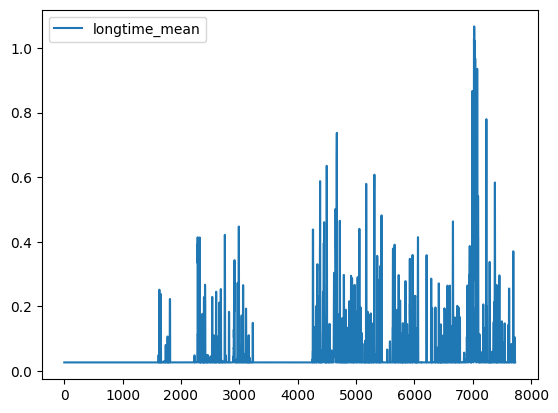

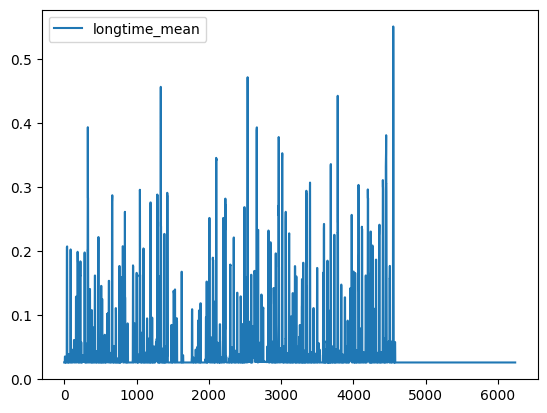

In [7]:
train_zuka.plot(y='longtime_mean')
train_form.plot(y='longtime_mean')

<AxesSubplot:>

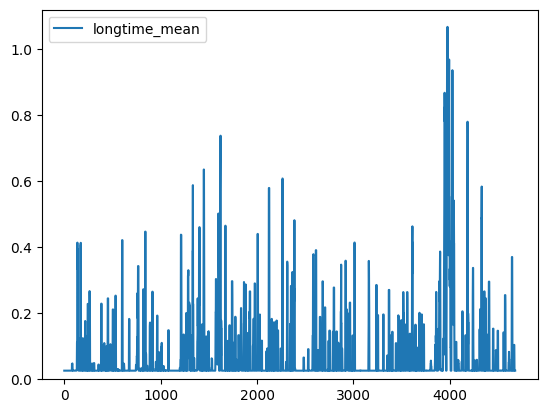

In [8]:
# print gaps in time in train
train_zuka_cut = pd.concat([train_zuka[2150:3300], train_zuka[4200:]])
train_zuka_cut = train_zuka_cut.reset_index(drop=True)
train_zuka_cut.plot(y='longtime_mean', kind='line', ylim=0)
# train_zuka_cut = train_zuk
# train_zuka_cut = train_zuka_cut.reset_index(drop=True)

# train_zuka_cut.plot(y='longtime_mean', k÷ind='line', ylim=0)


<AxesSubplot:>

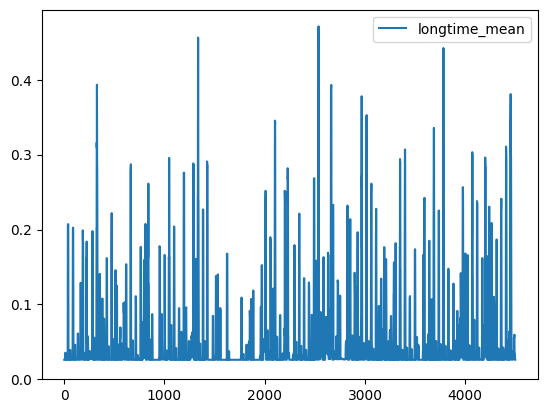

In [9]:

train_form_cut = train_form[0:4500]
train_form_cut.plot(y='longtime_mean', kind='line', ylim=0)

In [10]:

from pytz import utc
from smartboiler.data_handler import DataHandler
from smartboiler.forecast import Forecast
from datetime import datetime, timedelta
start_of_data = datetime(2023, 11, 1)
end_of_data = datetime(2023, 12, 10)
end_of_training_data = datetime(2023, 12, 31, 0, 0, 0)
dataHandler = DataHandler(
    "localhost",
    "smart_home_zukalovi",
    "root",
    "root",
    "shelly1pm_84cca8b07eae",
    "shelly1pm_84cca8b07eae_power",
    "esphome_web_c771e8_tmp3",
    "esphome_web_c771e8_ntc_temperature_b_constant_2",
start_of_data,
)

forecast = Forecast(dataHandler, start_of_data=start_of_data, model_path='lstm_model_zukalovi.keras')
# forecast.load_model(left_time_interval=start_of_data, right_time_interval=end_of_training_data)







In [11]:
training_data_merged = pd.concat([train_zuka_cut, train_form_cut])

In [12]:
# forecast.load_model(left_time_interval=datetime(2024, 1, 1, 0, 0, 0, 0), right_time_interval=datetime(2024, 2, 1, 0, 0, 0))

In [13]:

forecast.train_model(df_training_data=train_zuka_cut)
forecast.build_model()

# # forecast.train_model(df_training_data=train_zuka_cut)
# # forecast.build_model()

# # forecast.train_model(df_training_data=train_form_cut)
forecast.fit_model()

Start training
Epoch 1/70
1401/1401 - 3s - loss: 0.6757 - r2_keras: -5.0053e+04 - val_loss: 1.6977 - val_r2_keras: -3.1782e+06 - 3s/epoch - 2ms/step
Epoch 2/70
1401/1401 - 2s - loss: 0.4844 - r2_keras: -4.1542e+04 - val_loss: 0.4661 - val_r2_keras: -5.0525e+06 - 2s/epoch - 2ms/step
Epoch 3/70
1401/1401 - 2s - loss: 0.4490 - r2_keras: -4.8320e+03 - val_loss: 1.8118 - val_r2_keras: -2.5881e+06 - 2s/epoch - 2ms/step
Epoch 4/70
1401/1401 - 2s - loss: 0.4237 - r2_keras: -4.1563e+04 - val_loss: 0.4161 - val_r2_keras: -3.9898e+06 - 2s/epoch - 2ms/step
Epoch 5/70
1401/1401 - 2s - loss: 0.4435 - r2_keras: -2.9389e+04 - val_loss: 2.0259 - val_r2_keras: -2.8793e+06 - 2s/epoch - 2ms/step
Epoch 6/70
1401/1401 - 2s - loss: 0.4094 - r2_keras: -2.4235e+04 - val_loss: 0.3949 - val_r2_keras: -3.7887e+06 - 2s/epoch - 2ms/step
Epoch 7/70
1401/1401 - 2s - loss: 0.3678 - r2_keras: -9.3185e+03 - val_loss: 1.7304 - val_r2_keras: -1.8936e+06 - 2s/epoch - 2ms/step
Epoch 8/70
1401/1401 - 2s - loss: 0.3792 - r2_k

In [14]:
one_week_prediction = []
number_of_30_minutes = 14*24*2
end_train = datetime(2024,3,1, 0, 0, 0)
start_of_data_loader_for_forecast = end_train
end_of_data_loader_for_forecast = end_train + timedelta(hours=25)

start_of_prediction = end_of_data_loader_for_forecast + timedelta(minutes=30)
end_of_prediction = start_of_prediction + timedelta(days=14)

In [15]:
# iterate over one week by 30 minutes, get the prediction first value and save to variable one_week_prediction


for i in range(0, number_of_30_minutes):
    if i % 100 == 0:
        print(i)
    next_steps = forecast.get_forecast_next_steps(left_time_interval=start_of_data_loader_for_forecast, right_time_interval=end_of_data_loader_for_forecast)
    one_week_prediction.append(next_steps.values)
    start_of_data_loader_for_forecast += timedelta(minutes=30)
    end_of_data_loader_for_forecast += timedelta(minutes=30)

0
100
200
300
400
500
600


In [67]:
data_truth = dataHandler.get_data_for_training_model(left_time_interval=start_of_prediction + timedelta(minutes=30), right_time_interval=end_of_prediction + timedelta(minutes=30), predicted_column="longtime_mean")

In [68]:
# Flatten the list of lists
flattened_list = [item for sublist in one_week_prediction for item in sublist]
print(len(flattened_list))

# Reshape the flattened list to make it 2D
reshaped_data = [flattened_list[i:i+12] for i in range(0, len(flattened_list), 12)]

# flatten the values of the reshaped list


8064


In [69]:

for row in reshaped_data:
    for i in range(0, len(row)):
        row[i] = row[i][0]

In [70]:
import pandas as pd

In [71]:
df = pd.DataFrame(reshaped_data)
print(df.shape)
df['truth'] = data_truth[0]['longtime_mean'].values


(672, 12)


In [87]:
print(df.shape)
print()
df_shift = df.copy()
# shift to the top based on column = 0 no, 1 1, 2 2
for i in range(0, 12):
    df_shift[i] = df_shift[i].shift(-i-2)
    # remove list from value
    

print(df_shift)



(672, 13)

            0         1         2         3         4         5         6  \
0    0.026044  0.026043  0.026044  0.026043  0.026045  0.026051  0.026060   
1    0.026044  0.026044  0.026043  0.026043  0.026058  0.038817  0.026074   
2    0.026043  0.026044  0.026043  0.026042  0.026046  0.026055  0.026068   
3    0.026044  0.026043  0.026043  0.026043  0.026070  0.038168  0.026067   
4    0.026044  0.026043  0.026042  0.026042  0.026048  0.026062  0.026073   
..        ...       ...       ...       ...       ...       ...       ...   
667  0.026069  0.026052  0.026045       NaN       NaN       NaN       NaN   
668  0.026063  0.026047       NaN       NaN       NaN       NaN       NaN   
669  0.026052       NaN       NaN       NaN       NaN       NaN       NaN   
670       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
671       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            7         8         9        10        11     truth 

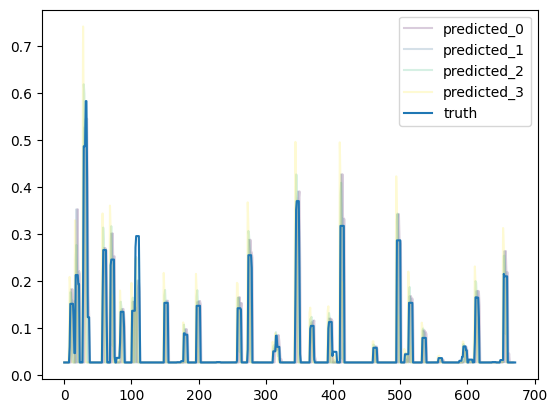

In [88]:
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
number_of_steps = 4
#create a list of collors from 0 to 12 based on color
colors = plt.cm.viridis(np.linspace(0, 1, number_of_steps))
for i in range(0, number_of_steps):
    #make the plot wider
    plt.plot(df_shift[i][:], label=f'predicted_{i}', color=colors[i], alpha=0.2, )
# i =0
# plt.plot(df_shift[i], label=f'{i}_step_ahead')
plt.plot(df_shift['truth'][:], label='truth')
plt.legend()   
plt.show()

In [89]:
df_shift

,0,1,2,3,4,5,6,7,8,9,10,11,truth
0,0.026044,0.026043,0.026044,0.026043,0.026045,0.026051,0.026060,0.026054,0.026080,0.026087,0.026096,0.297387,0.026042
1,0.026044,0.026044,0.026043,0.026043,0.026058,0.038817,0.026074,0.026064,0.026072,0.026088,0.026052,0.026058,0.026042
2,0.026043,0.026044,0.026043,0.026042,0.026046,0.026055,0.026068,0.026070,0.050778,0.026069,0.026054,0.026077,0.026042
3,0.026044,0.026043,0.026043,0.026043,0.026070,0.038168,0.026067,0.090854,0.187457,0.026062,0.026059,0.026085,0.026042
4,0.026044,0.026043,0.026042,0.026042,0.026048,0.026062,0.026073,0.247983,0.026093,0.026067,0.026088,0.026098,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.026069,0.026052,0.026045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026046
668,0.026063,0.026047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026046
669,0.026052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026046
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026047


In [90]:
from scipy import stats
dropped_shift = df_shift.dropna()
statistics = {i: {'RMSE': 0, 'MSE': 0, 'MAE': 0, 'r2':0, 'slope':0, 'intercept':0, 'std_err':0, 'integral':0} for i in range(0, 12)}
statistics['truth'] = {'RMSE': 0, 'MSE': 0, 'MAE': 0, 'r2':0, 'slope':0, 'intercept':0, 'std_err':0, 'integral':0}
statistics['truth']['integral'] = np.trapz(dropped_shift['truth'])
for i in range(0, 12):
    #  count rmse, mse, mae with df_shift['true] and df_shift[i]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=dropped_shift[i],y=dropped_shift["truth"])

    statistics[i]['RMSE'] = np.sqrt(np.mean((dropped_shift["truth"] - dropped_shift[i])**2))
    statistics[i]['MSE'] = np.mean((dropped_shift["truth"] - dropped_shift[i])**2)
    statistics[i]['MAE'] = np.mean(np.abs(dropped_shift["truth"] - dropped_shift[i]))
    statistics[i]["r2"] = r_value*r_value
    statistics[i]["integral"] = np.trapz(dropped_shift[i])
    print(r_value**2)
    statistics[i]["slope"] = slope
    statistics[i]["intercept"] = intercept
    statistics[i]["std_err"] = std_err
    

0.4039972715934524
0.7148235465550623
0.5226278721916358
0.17304890582186144
0.05668493160742961
0.00048363302835403133
0.0003455925615718227
0.004500445983584118
0.00396936921617426
5.8229943770632846e-05
0.00019240658754482326
0.00044186764190421726


In [91]:
# plot integral of all columns
import matplotlib.pyplot as plt
import numpy as np

for key, value in statistics.items():
    print(key, value['integral'])

0 34.14162403360557
1 34.525265486525264
2 32.16568741463337
3 32.85688131947789
4 30.79318122147503
5 23.344183792029835
6 19.968957730306343
7 27.110621391213627
8 26.85745556468781
9 21.74216369721232
10 20.161365013868078
11 28.697358363986627
truth 42.25590515724941


<AxesSubplot:>

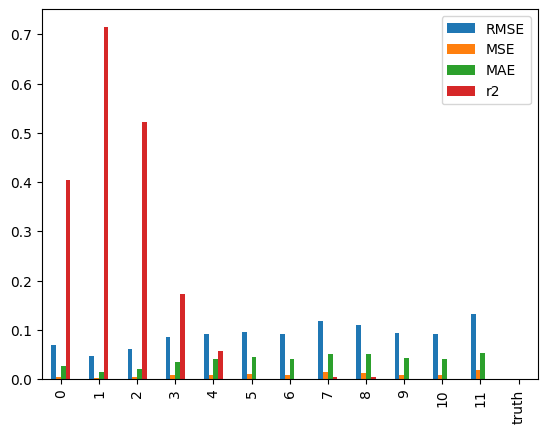

In [92]:
# plot stats
stats_df = pd.DataFrame(statistics)
stats_df = stats_df.T
stats_df.plot(kind='bar', y=['RMSE', 'MSE', 'MAE', 'r2'])

In [93]:
data_truth_longtime_mean = data_truth[0]['longtime_mean']

In [94]:
from operator import le
import pandas as pd
import numpy as np

forecast_begin_date = datetime(2024, 1, 4, 6, 0, 0)
queries = dataHandler.get_database_queries(
    left_time_interval=forecast_begin_date - timedelta(hours=12),
    right_time_interval=forecast_begin_date,
)
df_all = dataHandler.get_df_from_queries(queries)
df_all = dataHandler.process_kWh_water_consumption(df_all)
df_all.index = df_all.index.tz_localize(None)
df_all, _ = dataHandler.transform_data_for_ml(df_all, predicted_column="longtime_mean")
df_test = df_all.copy()
df_test = df_test[-12:]
df_all = df_all[:-12]
df_all_copy = df_all.copy()
forecast_future = pd.DataFrame()

current_forecast_begin_date = forecast_begin_date
current_forecast_end_date = forecast_begin_date + timedelta(minutes=30)
for i in range(0, 6):
    print("-----")

    df_predict = pd.DataFrame(
        {
            "datetime": pd.date_range(
                current_forecast_begin_date, current_forecast_end_date, freq="30min"
            )
        }
    )
    df_predict["longtime_mean"] = 0
    df_predict["weekday_sin"] = np.sin(
        2 * np.pi * df_predict["datetime"].dt.weekday / 7
    )
    df_predict["weekday_cos"] = np.cos(
        2 * np.pi * df_predict["datetime"].dt.weekday / 7
    )
    df_predict["hour_sin"] = np.sin(2 * np.pi * df_predict["datetime"].dt.hour / 24)
    df_predict["hour_cos"] = np.cos(2 * np.pi * df_predict["datetime"].dt.hour / 24)
    df_predict["minute_sin"] = np.sin(2 * np.pi * df_predict["datetime"].dt.minute / 60)
    df_predict["minute_cos"] = np.cos(2 * np.pi * df_predict["datetime"].dt.minute / 60)
    # delete column datetime
    df_predict = df_predict.drop(columns="datetime")
    len_df_predict = df_predict.shape[0]

    # concar df_all and df_predict

    df_all = pd.concat([df_all, df_predict], axis=0)
    df_all = df_all.reset_index(drop=True)

    df_predict_norm = df_all.copy()
    df_predict_norm[df_all.columns] = forecast.scaler.transform(df_all)
    # create predict df with values

    predict_gen = forecast.generator(
        dataframe=df_predict_norm,
        target_name=forecast.predicted_column,
        lookback=forecast.lookback,
        delay=forecast.delay,
        min_index=0,
        max_index=None,
        step=1,
        shuffle=False,
        batch_size=df_predict.shape[0],
    )

    (X, y_truth) = next(predict_gen)

    y_pred = forecast.model.predict(X)

    # np.expand_dims(y_truth,axis=1).shape
    y_pred_inv = np.concatenate(
        (y_pred, np.zeros((y_pred.shape[0], forecast.num_of_features))), axis=1
    )
    y_pred_inv = forecast.scaler.inverse_transform(y_pred_inv)
    y_pred_inv = y_pred_inv[:, 0]
    # set df_all last len_df_predict values to y_pred_inv
    df_all.iloc[-len_df_predict:, df_all.columns.get_loc("longtime_mean")] = y_pred_inv
    # plt.plot(df_all.iloc[-len_df_predict:, df_all.columns.get_loc('longtime_mean')], color = 'green', label = 'Predicted data')
    df_all = df_all[len_df_predict:]
    forecast_future = pd.concat([forecast_future, df_all[-len_df_predict:]], axis=0)
    forecast_future = forecast_future.reset_index(drop=True)

    current_forecast_begin_date = current_forecast_begin_date + timedelta(hours=1)
    current_forecast_end_date = current_forecast_end_date + timedelta(hours=1)


-----
1/1 [==============================] - 0s 12ms/step
-----
1/1 [==============================] - 0s 14ms/step
-----
1/1 [==============================] - 0s 10ms/step
-----
1/1 [==============================] - 0s 10ms/step
-----
1/1 [==============================] - 0s 11ms/step
-----
1/1 [==============================] - 0s 11ms/step


<AxesSubplot:>

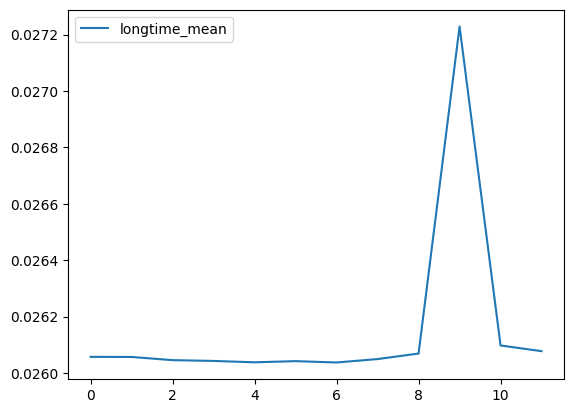

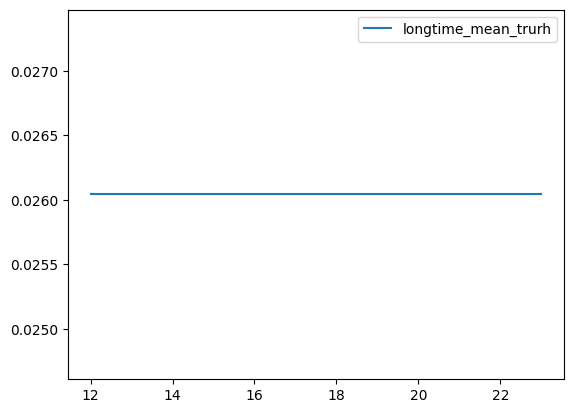

In [95]:
forecast_future.plot(y='longtime_mean', label='longtime_mean')
df_test.plot(y='longtime_mean', label='longtime_mean_trurh')

In [96]:
print(forecast_future['longtime_mean'])

0     0.026057
1     0.026057
2     0.026046
3     0.026043
4     0.026038
5     0.026042
6     0.026037
7     0.026049
8     0.026069
9     0.027229
10    0.026098
11    0.026077
Name: longtime_mean, dtype: float64


In [97]:
# plt.plot(forecast_future['consumed_heat_kWh'], label="Predicted")

begin = datetime(2024, 1, 1, 0, 0, 0) 
end = datetime(2024, 1, 1, 23, 59, 59)

queries = dataHandler.get_database_queries(left_time_interval=begin - timedelta(days=1), right_time_interval=begin)
df_all = dataHandler.get_df_from_queries(queries)
df_all = dataHandler.process_kWh_water_consumption(df_all)

In [98]:

df_all, _= dataHandler.transform_data_for_ml(df_all, predicted_column='longtime_mean')



In [99]:
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np

df_predict_norm = df_all.copy()
df_predict_norm[df_predict_norm.columns] = forecast.scaler.transform(df_all)
# create predict df with values 

predict_gen = forecast.generator(dataframe = df_predict_norm, 
        target_name = forecast.predicted_column, 
        lookback = forecast.lookback,
        delay = forecast.delay,
        min_index = 0,
        max_index = None,
        step = 1,
        shuffle = False,
        batch_size = df_predict_norm.shape[0])

(X, y_truth) = next(predict_gen)

y_pred = forecast.model.predict(X)

# np.expand_dims(y_truth,axis=1).shape
y_pred_inv = np.concatenate((y_pred,np.zeros((y_pred.shape[0],forecast.num_of_features))),axis=1)
y_pred_inv = forecast.scaler.inverse_transform(y_pred_inv)
y_pred_inv = y_pred_inv[:,0]

y_truth_inv = np.concatenate((np.expand_dims(y_truth,axis=1),np.zeros((y_truth.shape[0],forecast.num_of_features))),axis=1)
y_truth_inv = forecast.scaler.inverse_transform(y_truth_inv)
y_truth_inv = y_truth_inv[:,0]

statistics = {}
slope, intercept, r_value, p_value, std_err = stats.linregress(x=y_pred_inv,y=y_truth_inv)
mse = mean_squared_error(y_true=y_truth_inv, y_pred=y_pred_inv, squared=True)
rmse = mean_squared_error(y_true=y_truth_inv, y_pred=y_pred_inv, squared=False)

statistics['slope'] = slope
statistics['intercept'] = intercept
statistics['r_value'] = r_value
statistics['p_value'] = p_value
statistics['std_err'] = std_err
statistics['mse'] = mse
statistics['rmse'] = rmse




2/2 [==============================] - 0s 1ms/step


In [100]:
print(statistics)

{'slope': 1.225940277460354, 'intercept': 0.018315911051692488, 'r_value': 0.867916349437539, 'p_value': 4.1605134073607005e-13, 'std_err': 0.11381588754785979, 'mse': 0.00791569781649771, 'rmse': 0.08897020746574502}


In [101]:
import matplotlib.pyplot as plt
df = pd.concat(df_all_list, axis=1)
df = df[['water_flow_L_per_hour_mean', 'water_temperature_mean', 'boiler_wattage_mean']]
df['water_flow_L_per_hour_mean'] = df['water_flow_L_per_hour_mean']

df = df.resample('1min').mean()
df[f"consumed_heat_kJ"] = (
            df[f"water_flow_L_per_hour_mean"]
            * (df[f"water_temperature_mean"] - 10)
            * 4.186
            * 0.5
            
            
        )
df['boiler_wattage_kWh'] = df['boiler_wattage_mean'] / (1000*60)
df = df.groupby(pd.Grouper(freq='7D'))
df = df.agg({'consumed_heat_kJ': 'sum', 'water_flow_L_per_hour_mean': 'mean', 'water_temperature_mean': 'mean', 'boiler_wattage_kWh': 'sum'})
        
# df consumed_heat_kJ to kWh
df[f"consumed_heat_kWh"] = df[f"consumed_heat_kJ"] / (3600)
df[f"consumed_heat_kWh"] += 0.4*7
print(df)

df['heat_loss'] = df['consumed_heat_kWh'] - df['boiler_wattage_kWh']

plt.plot( df['boiler_wattage_kWh'], label="boiler_heat_kWh")
plt.plot( df['consumed_heat_kWh'], label="consumed_heat_kWh")
plt.legend()



NameError: name 'df_all_list' is not defined